# Big Mart Sales Prediction


#### Previsão de vendas do BigMart 

No dataset utilizado, temos o conjunto de dados de treino (8523) e de teste (5681), o conjunto de dados de treino tem variáveis de entrada e de saída. O objetivo é prever as vendas do conjunto de dados de teste.

* **Item_Identifier**: ID do produto

* **Item_Weight**: Peso do produto

* **Item_Fat_Content**: Teor de gordura do produto (baixo ou alto)

* **Item_Visibility**: A porcentagem da area de exibição dos produtos em uma determinada loja

* **Item_Type**: A categoria do produto

* **Item_MRP**: Preço máximo do varejo

* **Outlet_Identifier**: ID da loja

* **Outlet_Establishment_Year**: O ano em que a loja foi criada

* **Outlet_Size**: O tamanho da loja

* **Outlet_Location_Type**: O tipo da cidade em que determinada loja está localizada

* **Outlet_Type**: Se é uma mercearia ou um supermercado

* **Item_Outlet_Sales**: Vendas do produto em uma loja especifica (variável alvo)

Baseado no projeto do site analyticsvidhya.com

## 1) Perguntas

**Perguntas que serão respondidas ao longo deste notebook:**

1) Qual tipo de loja vende mais? Grande pequena ou média?

2) Em qual tipo de cidade ocorre mais vendas?

3) Qual tipo de produto vende mais? 


## 2) Exploração dos Dados

In [83]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [84]:
# Lendo aquivos
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

train = df_train.copy() # não alterar as originais
test = df_test.copy()

In [85]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [86]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [87]:
# Combinando os datasets em um só

train['source']='train' # coluna para identificão
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print ("Tamanho do dataset treino: ", train.shape, "\nTamanho Teste: ", test.shape, 
       "\nTamanho Total:", data.shape)

Tamanho do dataset treino:  (8523, 13) 
Tamanho Teste:  (5681, 12) 
Tamanho Total: (14204, 13)


In [88]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


### 2.1) Procurando Valores Nulos

In [89]:
# Quantidade de valores nulos por atributo
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

**Obs:** Item_Outlet_Sales é a varável "target" (alvo) do dataset de treino, logo os valores ausentes são os do conjunto de teste

In [90]:
# Olhando estatísticas básicas
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [91]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

### 2.2) Explorando a frequência em Atributos Categóricos


In [92]:
data.apply (lambda x: len (x.unique ())) #Vemos que há 1559 produtos em 10 lojas

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [93]:
#Filtrar valores categóricos
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#Excluir colunas 'ID' e 'source':
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

#Imprimir frequencia das categorias
for col in categorical_columns:
    print ('\n\tFrequencia de categorias para a variável: %s'%col)
    print (data[col].value_counts())


	Frequencia de categorias para a variável: Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

	Frequencia de categorias para a variável: Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

	Frequencia de categorias para a variável: Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

	Frequencia de categorias para a variável: Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Lo

**Algumas observações:**

1. **Item Fat Content**: Alguns valores de 'Low Fat' foram registrados como sendo 'LF' e 'low fat', e alguns valores de 'Regular Fat' foram registrados como 'Reg' 
2. **Item Type**: Algumas categorias não tem numeros significativos, talvez combina-los pode dar resultados melhores
3. **Outlet_Type**: Type3 e Type2 podem ser combinados, é necessário verificar se isso é uma boa ideia.

## 3) Limpeza de Dados

* Outliers afetam muito em regressão
* algoritmos avançados baseados em árvore são impermeáveis a valores discrepantes.

### 3.1) Impuntando valores ausentes (conferir depois)

* Variáveis com valores ausentes: Item_weight e Outlet_Size

In [94]:
# Vamos substituir os valores nulos de 'Item_Weight' pela média 
mean = data["Item_Weight"].mean() 
data["Item_Weight"].fillna(mean, inplace=True)

#substituir os valores nulos de 'Outlet_Size' pela categoria mais frequente
mode = data['Outlet_Size'].mode()[0]  
data["Outlet_Size"].fillna(mode, inplace=True)

**Verificando se ainda há valores ausentes:**

In [95]:
sum(data['Outlet_Size'].isnull())

0

## 4) Engenharia de Recursos (Feature Engineering)



### 4.1) Combinar o Outlet_Type

Durante a exploração, decidimos considerar a combinação das variáveis **Supermarket Type2** e **Type3**. Mas isso é uma boa ideia? Uma forma rápida de verificar isso seria analisar as vendas médias por tipo de loja. Se eles tiverem vendas semelhantes, mantê-los separados não ajudará muito.

In [96]:
data.pivot_table(values = 'Item_Outlet_Sales', index = 'Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


Isso mostra uma diferença significativa entre eles e vamos deixá-los como estão.


### 4.2) Modificar o Item_Visibility

O balor mínimo aqui é 0, o que não faz sentido na prática. Vamos considerá-lo como informação faltante e imputá-lo com visibilidade média daquele produto.



In [97]:
mean = data['Item_Visibility'].mean()
data['Item_Visibility'] = data['Item_Visibility'].replace([0], mean)


### 4.3) Criar uma categoria para o tipo do Item


Criando uma nova coluna baseada nos valores da variável **Item_Identifier** (FD, DR ou NC)

In [98]:
#Pega os primeiros 2 caracteres do ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Renomeia para caregorias mais intuitivas
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

### 4.4) Determinar os anos de operação de uma loja

Criar uma nova coluna com os anos de operação de uma loja. 

In [99]:
# 2013 é o ano em que os dados foram coletados
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

### 4.5) Modificar as categorias de 'Item_Fat_Content'

In [100]:
print ('\tCategorias Originais:')
print (data['Item_Fat_Content'].value_counts())

print ('\n\tCategorias modificadas:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

	Categorias Originais:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

	Categorias modificadas:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Vimos anteriormente que o dataset possui produtos 'não consumíveis', logo o teor de gordura não deveria ser especificado para eles. 

Portanto, também podemos criar uma categoria separada para esse tipo de observação.

In [101]:
data.loc[data['Item_Type_Combined']=="Non-Consumable", 'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### 4.6) LabelEncoder e One-Hot Coding

Tranformação de variáveis categóricas para variáveis numéricas.


In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

In [104]:
# Transformando as variáveis categóricas em numéricas
var_categ = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_categ:
    data[i] = le.fit_transform(data[i])

In [105]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,1,14,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,4,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,1,14,9
3,FDX07,19.20,2,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,1,15,0
4,NCD19,8.93,1,0.065953,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,2,26,1


Usaremos o **One-Hot-Coding** para criar "variáveis-dummies" para cada categoria de cada variável categórica

In [106]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [107]:
# Agora cada categoria possui uma nova variável
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [108]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)


,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


### 4.7) Exportando os dados

Dividir novamente o dataset em treino e teste 

In [109]:
# Apagar colunas que foram convertidas para tipos diferentes:
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis = 1, inplace=True)

#Dividir em treino e teste:
train = data.loc[data['source'] == "train"]
test = data.loc[data['source'] == "test"]

#Apagar colunas desnecessarias
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)
train.drop(['source'], axis = 1, inplace=True)

#Exportar
train.to_csv("data/train_modified.csv", index = False)
test.to_csv("data/test_modified.csv", index = False)

## 5) Construindo Modelos Preditivos 

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### 5.1) Modelo de solução básica (baseline)

Um "baseline model" é uma estimativa que não requer nenhum modelo preditivo. Nesse caso, vamos prever as vendas utilizando a média geral das vendas

In [111]:
train['Item_Outlet_Sales'].mean()

2181.2889135750365

In [112]:
#Média:
mean_sales = train['Item_Outlet_Sales'].mean()

#Definindo um dataframe com ID's e previsão:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Exportando resultados
#base1.to_csv("alg0.csv",index=False)

Modelos de baseline servem para definir uma espécie de referência, se os demais algoritmos preditivos estiverem pior do que esse então há algo errado.

In [113]:
#Define a variavel alvo (target) e as colunas ID:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predizendo o conjunto de treino:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
   
    #Relatorio do modelo:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("Cross Val Score :\n Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predizendo os dados de teste
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    #IDcol.append(target)
    #submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    #submission.to_csv(filename, index=False)

### 5.2) Regressão Linear

In [114]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso


Model Report
RMSE : 1127
Cross Val Score :
 Mean - 1129 | Std - 43.45 | Min - 1075 | Max - 1210


<AxesSubplot:title={'center':'Model Coefficients'}>

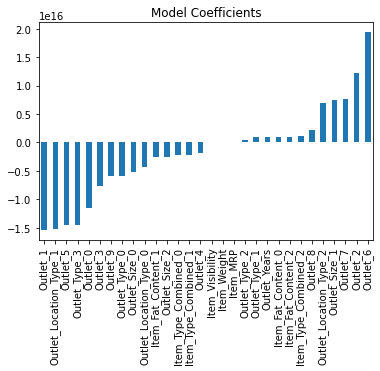

In [115]:
# variáveis preditoras
predictors = [x for x in train.columns if x not in [target]+IDcol]

model1 = LinearRegression(normalize=True)
modelfit(model1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(model1.coef_, predictors).sort_values() # coeficientes para cada variável
coef1.plot(kind='bar', title='Model Coefficients')

### 5.3) Modelo: Árvore de Decisão

In [116]:
from sklearn.tree import DecisionTreeRegressor


Model Report
RMSE : 1060
Cross Val Score :
 Mean - 1091 | Std - 45.27 | Min - 1014 | Max - 1181


<AxesSubplot:title={'center':'Feature Importances'}>

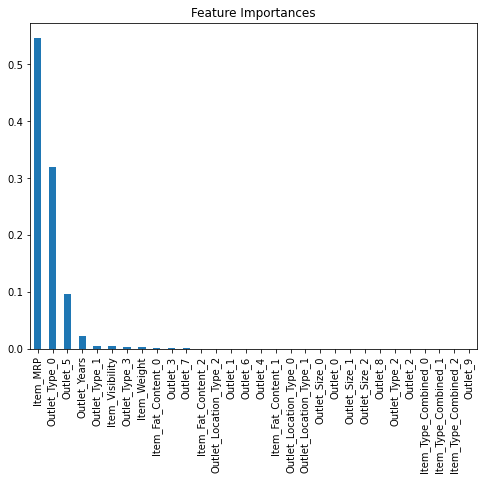

In [117]:
model2 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(model2, train, test, predictors, target, IDcol, 'alg3.csv')


coef2 = pd.Series(model2.feature_importances_, predictors).sort_values(ascending=False)
coef2.plot(kind='bar', title='Feature Importances', figsize = (8, 6))

Através do gráfico acima, podemos ver as variáveis que o modelo considerou como sendo as mais importantes para realizar a predição. Agora vamos fazer um modelo apenas com as 4 variáveis mais importantes:


Model Report
RMSE : 1071
Cross Val Score :
 Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


<AxesSubplot:title={'center':'Feature Importances'}>

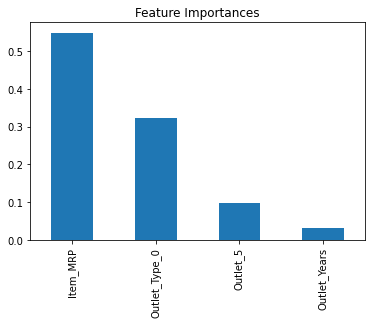

In [118]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']

model3 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(model3, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(model3.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

### 5.4) Random Forest 

In [119]:
from sklearn.ensemble import RandomForestRegressor



Model Report
RMSE : 1073
Cross Val Score :
 Mean - 1084 | Std - 43.57 | Min - 1021 | Max - 1161


<AxesSubplot:title={'center':'Feature Importances'}>

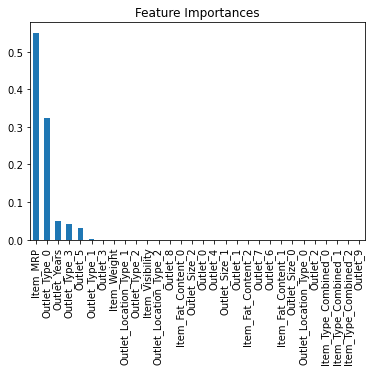

In [120]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100, n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

Agora tentaremos outra floresta aleatória com max_depth (profundidade máxima) de 6 e 400 árvores. Aumentar o número de árvores torna o modelo robusto, mas é computacionalmente caro.


Model Report
RMSE : 1068
Cross Val Score :
 Mean - 1083 | Std - 43.24 | Min - 1019 | Max - 1158


<AxesSubplot:title={'center':'Feature Importances'}>

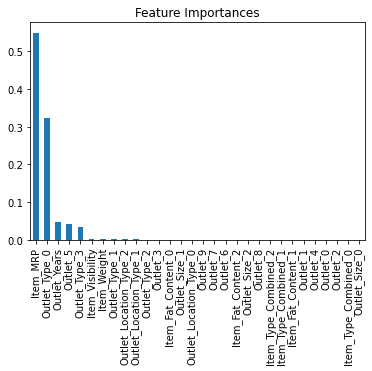

In [121]:
model6 = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4)
modelfit(model6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(model6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

### 5.5) Submissões Kaggle

(...)

# Respondendo Perguntas

### 1) Lojas maiores são as que vendem mais?

In [125]:
# OBS: Aplicar inputações também ao dataset original

newdataset = df_train[['Outlet_Size', 'Item_Outlet_Sales']]

newdataset.groupby(['Outlet_Size']).mean()

,Item_Outlet_Sales
Outlet_Size,
High,2298.995256
Medium,2681.603542
Small,1912.149161


**RSP:** Lojas de porte médio possuem uma média de vendas maior do que as demais

### 2) Em qual tipo de cidade ocorre mais vendas?

In [131]:
newdataset = df_train[['Outlet_Location_Type', 'Item_Outlet_Sales']]
newdataset.groupby(['Outlet_Location_Type']).mean()

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1876.909159
Tier 2,2323.990559
Tier 3,2279.627651


**RSP:** As cidades do tipo 2 possuem uma média de vendas maior

### Qual tipo de produto vende mais? 

In [143]:
newdataset = df_train[['Item_Type', 'Item_Outlet_Sales']]
newdataset.groupby(['Item_Type']).mean().sort_values('Item_Outlet_Sales')


,Item_Outlet_Sales
Item_Type,
Others,1926.139702
Baking Goods,1952.971207
Soft Drinks,2006.511735
Health and Hygiene,2010.000265
Breakfast,2111.808651
Frozen Foods,2132.867744
Hard Drinks,2139.221622
Meat,2158.977911
Breads,2204.132226


**RSP:** Os alimentos mais vendidos são os alimentos com amido (ex: batata, milho, aveia, arroz...), seguido de frutos do mar.